# 神經網路實做

## 拿取加權指數資料

In [11]:
from finlab.data import Data
%matplotlib inline

data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]
twii.plot()

KeyError: '0050'

## 製作features

In [2]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

## 刪除NaN

In [3]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (77691, 43)
after dropping NaN (75763, 43)


## 神經網路Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset[feature_names])
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,...,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,7.576300e+04,75763.000000
mean,1.505078e-15,1.950699e-15,-3.094903e-16,-2.793607e-15,-7.500505e-15,-4.806838e-15,7.558332e-17,-6.852344e-18,-3.631473e-17,-6.890261e-18,...,-4.439585e-15,6.148628e-17,-2.225344e-16,1.383035e-17,-1.592270e-16,2.555053e-16,-1.127793e-16,8.775573e-16,-8.313931e-16,1.000138
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.008231
min,-4.415853e+00,-4.562894e+00,-4.838376e+00,-4.828735e+00,-4.799266e+00,-4.737193e+00,-9.051690e+00,-2.589794e+00,-2.684256e+00,-2.664737e+00,...,-5.514127e+00,-9.498110e+00,-7.224096e+00,-2.110911e+00,-2.011895e+00,-1.698352e+00,-1.602972e+00,-1.737890e+00,-1.782266e+00,0.924507
25%,-6.807060e-01,-6.814938e-01,-6.713389e-01,-6.629413e-01,-6.569944e-01,-6.448907e-01,-4.610438e-01,-6.440836e-01,-6.423878e-01,-6.314287e-01,...,-5.246878e-01,-4.647105e-01,-4.681407e-01,-7.409312e-01,-6.980066e-01,-7.494024e-01,-7.007467e-01,-6.809198e-01,-7.131947e-01,0.997006
50%,9.821825e-02,1.169217e-01,1.167841e-01,1.197610e-01,1.232137e-01,1.279876e-01,8.959081e-02,-1.306240e-02,-3.121181e-02,-8.729650e-03,...,1.158162e-01,7.876030e-02,8.157558e-02,-1.513265e-01,-2.309329e-01,-2.693715e-01,-2.514092e-01,-2.333005e-01,-2.162162e-01,1.000289
75%,7.222920e-01,7.120943e-01,6.839675e-01,6.885921e-01,6.867743e-01,6.848377e-01,5.730704e-01,6.591302e-01,6.701211e-01,6.055306e-01,...,5.770070e-01,5.652723e-01,5.725854e-01,5.924690e-01,4.696386e-01,4.983406e-01,4.825995e-01,4.714285e-01,5.579244e-01,1.003696
max,2.882471e+00,2.825632e+00,3.029526e+00,3.106174e+00,3.125650e+00,3.140234e+00,5.028344e+00,2.730969e+00,2.590297e+00,2.560186e+00,...,4.879413e+00,4.765493e+00,4.028595e+00,4.522804e+00,4.098208e+00,3.855652e+00,3.574469e+00,3.682900e+00,3.531953e+00,1.087726


## 神經網路 Model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


## 神經網路訓練

In [6]:
dataset_scaled_train = dataset_scaled[:'2020']


model.fit(dataset_scaled_train[feature_names], dataset_scaled_train['return'] > 1)

68477/68477 [==============================] - ETA: 52:21 - loss: 0.68 - ETA: 1:02 - loss: 0.7115 - ETA: 30s - loss: 0.709 - ETA: 19s - loss: 0.70 - ETA: 14s - loss: 0.70 - ETA: 12s - loss: 0.70 - ETA: 9s - loss: 0.7008 - ETA: 8s - loss: 0.699 - ETA: 7s - loss: 0.698 - ETA: 7s - loss: 0.698 - ETA: 6s - loss: 0.698 - ETA: 6s - loss: 0.698 - ETA: 6s - loss: 0.698 - ETA: 6s - loss: 0.698 - ETA: 5s - loss: 0.698 - ETA: 5s - loss: 0.698 - ETA: 4s - loss: 0.696 - ETA: 4s - loss: 0.696 - ETA: 3s - loss: 0.696 - ETA: 3s - loss: 0.695 - ETA: 3s - loss: 0.695 - ETA: 3s - loss: 0.694 - ETA: 2s - loss: 0.694 - ETA: 2s - loss: 0.694 - ETA: 2s - loss: 0.694 - ETA: 2s - loss: 0.694 - ETA: 2s - loss: 0.694 - ETA: 1s - loss: 0.693 - ETA: 1s - loss: 0.693 - ETA: 1s - loss: 0.693 - ETA: 1s - loss: 0.692 - ETA: 1s - loss: 0.692 - ETA: 1s - loss: 0.692 - ETA: 1s - loss: 0.691 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.691 - ETA: 0s - 

## 回測

In [7]:
ey = model.predict(dataset_scaled[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset.index)

<AxesSubplot:xlabel='date'>

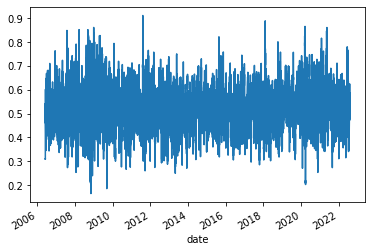

In [8]:
ey.plot()

<AxesSubplot:xlabel='date'>

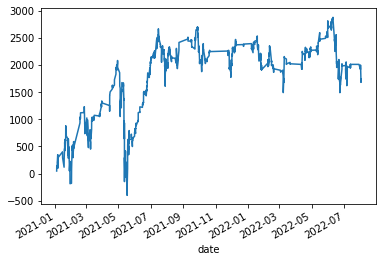

In [9]:
eq = twii[dataset.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0

eq = (gain[signal]['2021':]).cumsum()
eq.plot()

In [10]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2021':].sum()

420.0